# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290,1
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345,1
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,1
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,2
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,2
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64


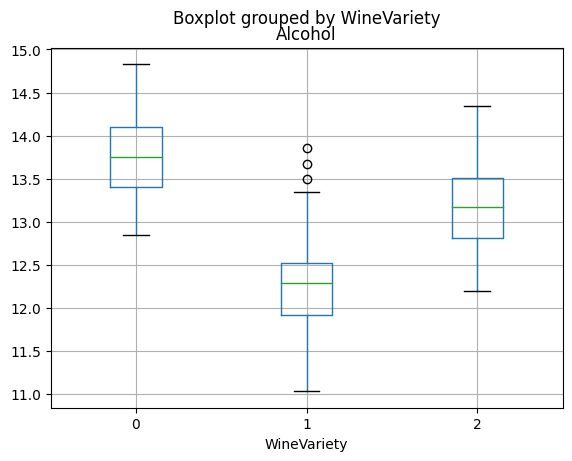

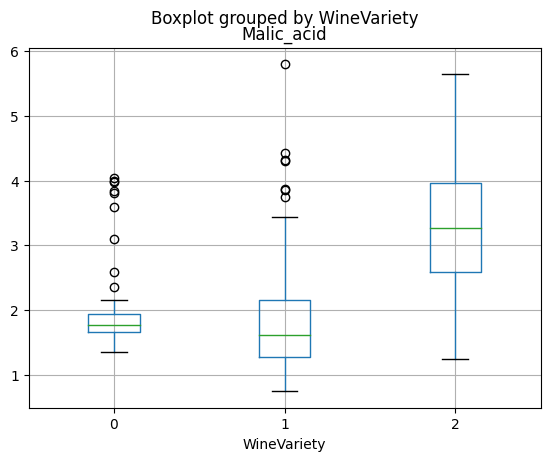

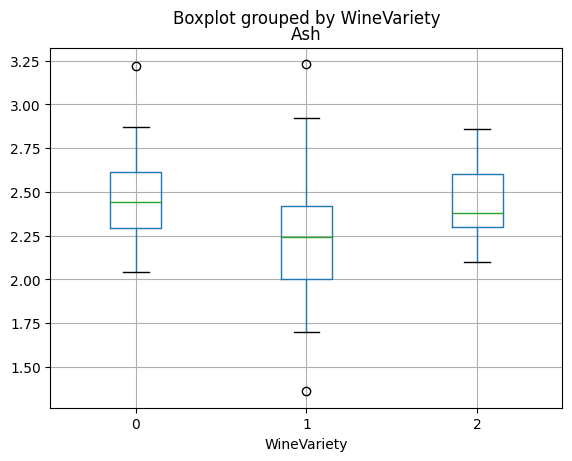

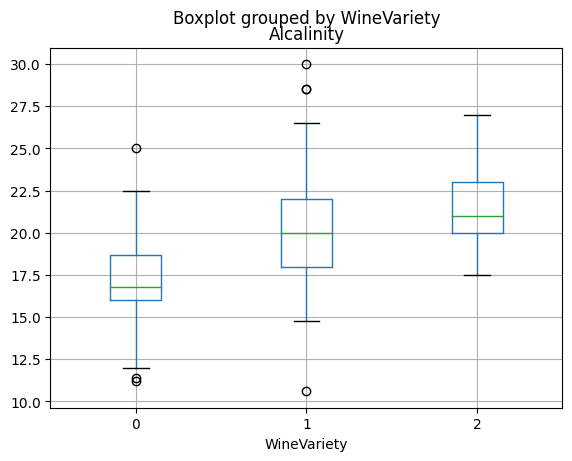

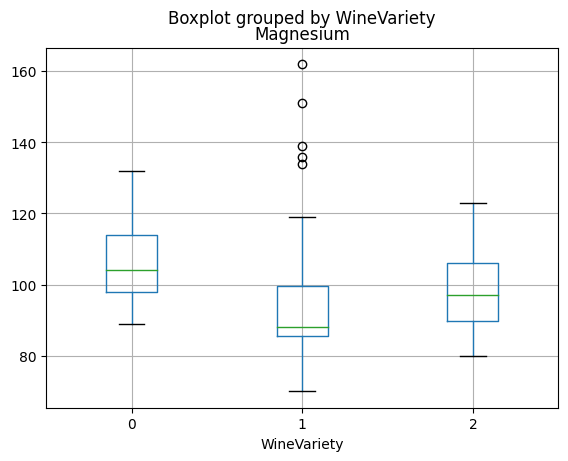

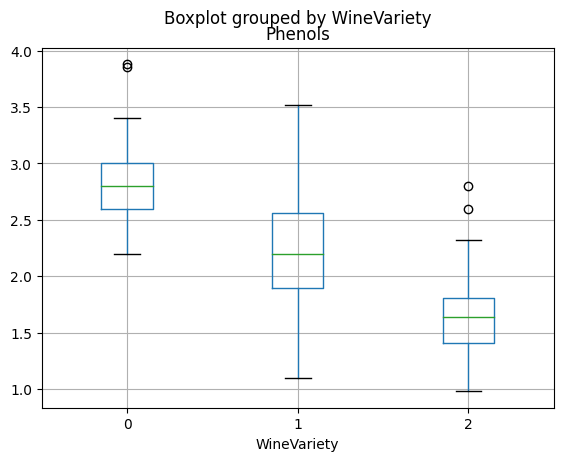

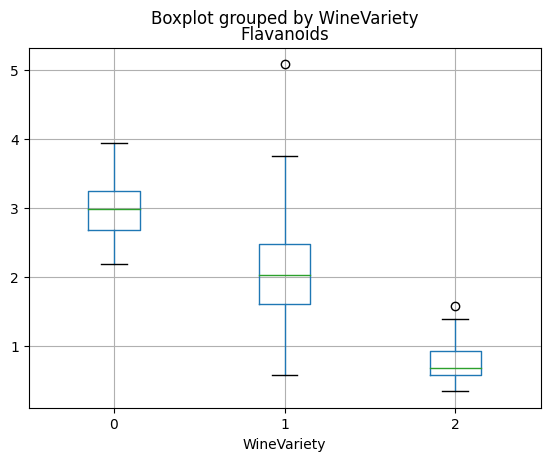

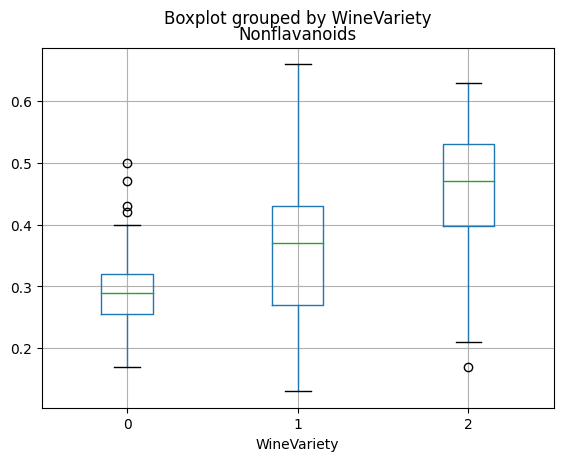

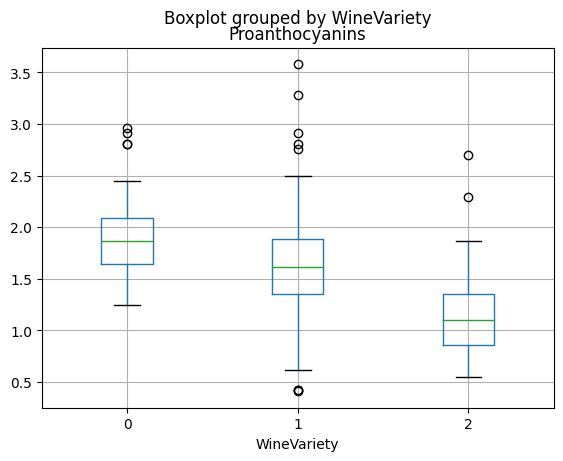

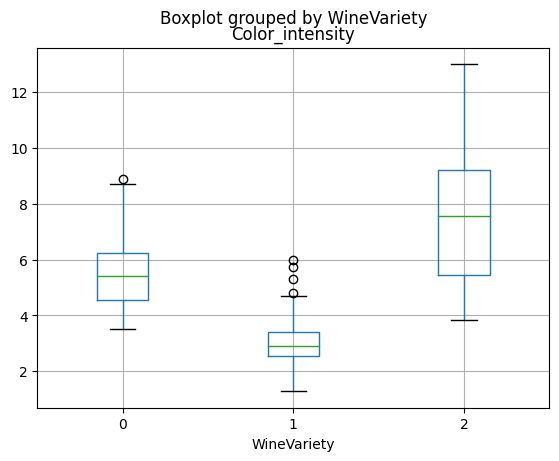

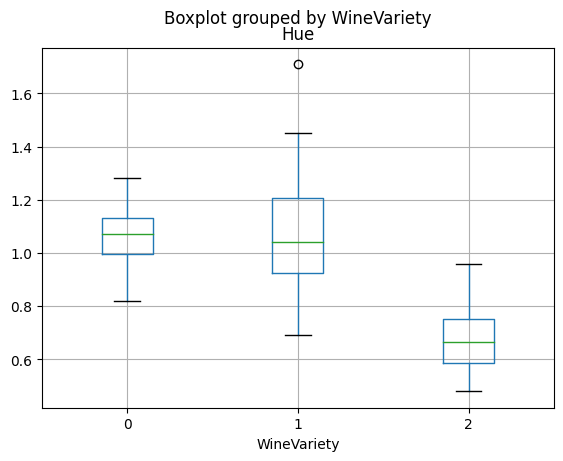

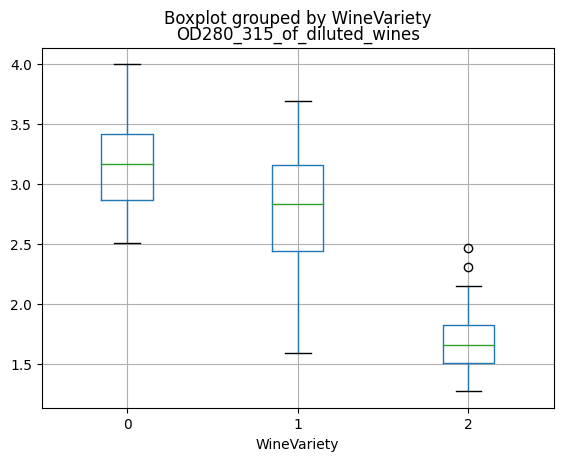

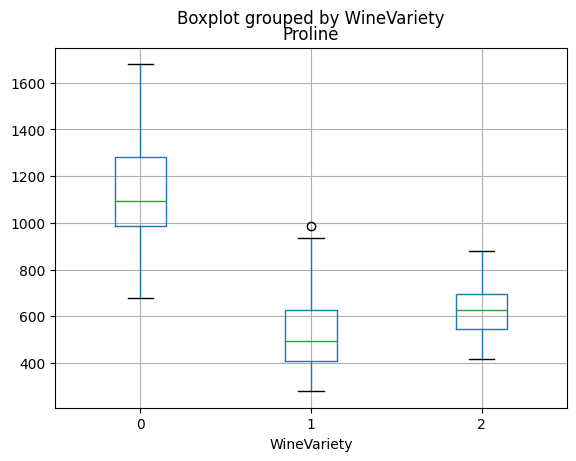

In [2]:
# Your code to evaluate data, and train and evaluate a classification model
# First Explore the data, check if any adjustments are needed.
# Checking for nulls
print(data.isnull().sum())
# Checking distributions of features 
import matplotlib.pyplot as plt
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'

for col in features:
    data.boxplot(column=col, by=label)
    plt.show()

In [3]:
# Next, split the data into train and test.
from sklearn.model_selection import train_test_split

X,y = data[features].values, data[label].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(f'Number of train rows: {X_train.shape[0]}.\nNumber of test rows: {X_test.shape[0]}.')

Number of train rows: 124.
Number of test rows: 54.


In [13]:
# Let's use a Logistic regression model to do this. 
from sklearn.linear_model import LogisticRegression
regularization = 0.1
multi_model = LogisticRegression(C=1/regularization,solver = 'lbfgs',multi_class='auto',max_iter=10000).fit(X_train, y_train)
predictions = multi_model.predict(X_test)

Confusion Matrix 
 [[19  0  0]
 [ 0 21  1]
 [ 0  0 13]] 

Metrics
Accuracy Score: 0.98
Precision Score: 0.98 
Recall Score: 0.98


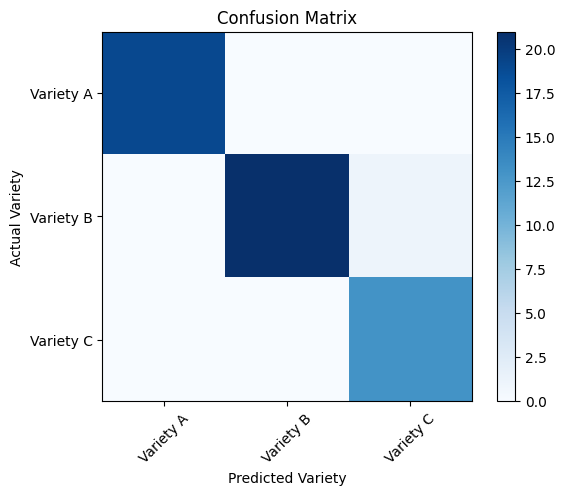

In [16]:
# Evaluate the performance by checking the confusion matrix and plotting AUC and ROC curves.
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

print("Confusion Matrix","\n",confusion_matrix(y_test, predictions),"\n")

print(f"Metrics\nAccuracy Score: {round(accuracy_score(y_test,predictions),2)}\nPrecision Score: {round(precision_score(y_test,predictions,average='macro'),2)} \nRecall Score: {round(recall_score(y_test,predictions,average='macro'),2)}")

cm = confusion_matrix(y_test, predictions)

classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Variety')
plt.ylabel('Actual Variety')
plt.show()



Average AUC: 0.9990530303030303


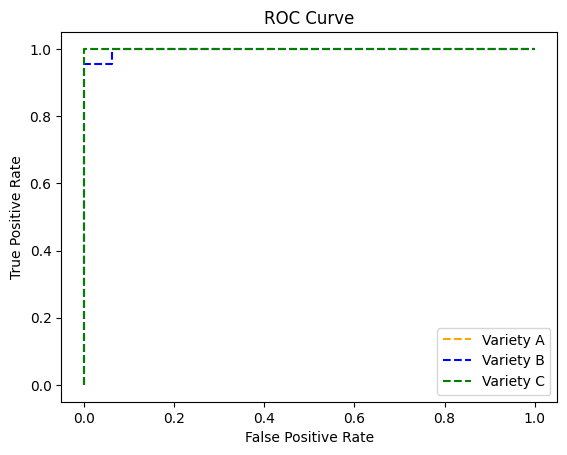

In [33]:
# probabilities 
probs = multi_model.predict_proba(X_test)
auc = roc_auc_score(y_test,probs,multi_class = 'ovr')
print('Average AUC:',auc)

# roc metrics for each class

fpr = {}
tpr = {}
thresh = {}

for i in range(len(classes)):
    fpr[i],tpr[i], thresh[i] = roc_curve(y_test, probs[:,i],pos_label=i)
    
plt.plot(fpr[0], tpr[0],linestyle='--',color='orange',label=classes[0])
plt.plot(fpr[1], tpr[1],linestyle='--',color='blue',label=classes[1])
plt.plot(fpr[2], tpr[2],linestyle='--',color='green',label=classes[2])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [30]:
print(fpr[0],'\n',tpr[0])

[0. 0. 0. 1.] 
 [0.         0.05263158 1.         1.        ]


In [6]:
# Next, build a data preprocessing pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# identify the data type columns, combine them, build the pipeline with the preprocessing and the estimator

num_features = [0,1,2,3,4,5,6,7,8,9,10,11,12]
num_transform = Pipeline(steps=[
                        ('scaler',StandardScaler())
                                ])

preprocessor = ColumnTransformer(
                                transformers = [
                                    ('preprocess',num_transform,num_features)
                                                ])

pipeline = Pipeline(steps = [('preprocessor',preprocessor),
                              ('regressor',LogisticRegression(C=1/regularization,solver = 'lbfgs',multi_class='auto',max_iter=10000))])

In [7]:
# Retrain the data, and evaluate using Confusion matrix and AUC/ROC curves.
preproc_model = pipeline.fit(X_train, y_train)
predictions = preproc_model.predict(X_test)
confusion_matrix(y_test,predictions)
print(f"Metrics\nAccuracy Score: {round(accuracy_score(y_test,predictions),2)}\nPrecision Score: {round(precision_score(y_test,predictions,average='macro'),2)} \nRecall Score: {round(recall_score(y_test,predictions,average='macro'),2)}")

Metrics
Accuracy Score: 1.0
Precision Score: 1.0 
Recall Score: 1.0


In [8]:
# Save the model for later use.
import joblib

filename = './log_model.pkl'
joblib.dump(preproc_model,filename)

['./log_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [9]:
# Your code to predict classes for the two new samples
import numpy as np

X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
wine_variety = ['Variety A','Variety B']
multi_model = joblib.load(filename)

predictions = multi_model.predict(X_new)

for prediction in predictions:
    print(prediction, '(' + wine_variety[prediction] + ')')


0 (Variety A)
1 (Variety B)
